# Global Metropolitan Economic Power: A Comprehensive Analysis of Urban GDP Concentration

**Understanding Urban Economic Dynamics**: Metropolitan areas represent the economic engines of nations, concentrating human capital, infrastructure, and innovation in ways that drive disproportionate wealth creation. This analysis examines metropolitan GDP data from 2017 to understand how economic power is distributed across global urban centers, revealing patterns of concentration, national economic strategies, and the relative importance of major cities in the global economy.

**Analytical Framework**: Through multiple visualization approaches—individual metro rankings, country-level distributions, proportional economic shares, and internal metropolitan hierarchies—we can understand both the absolute and relative economic significance of urban centers. This multi-dimensional analysis reveals insights into economic concentration patterns, national urban development strategies, and the competitive positioning of metropolitan areas in the global economic landscape.

In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the datasets
gdp_metropol = pd.read_excel('../data/gdp_metropol.xls')
gini_disposable = pd.read_excel('../data/gini_disposable_income.xls')
urban_popu = pd.read_excel('../data/urban_living_1.xlsx')
urban_greenspace = pd.read_excel('../data/urban_living_greenspace_2.xlsx')

In [5]:
# manage dataset 1
# set row 1 to column names
gdp_metropol.columns = gdp_metropol.iloc[0]
gdp_metropol = gdp_metropol[1:]

# remove last two rows
gdp_metropol = gdp_metropol[:-2]

# manage dataset 2
# set row 1 to column names
gini_disposable.columns = gini_disposable.iloc[0]
gini_disposable = gini_disposable[1:]

# remove last three rows
gini_disposable = gini_disposable[:-3]

# manage dataset3
# remove unwanted columns by name
urban_popu = urban_popu.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Name',
    'Data Units',
    'Data Source',
    'Footnote'
])

# manage dataset
# remove unwanted columns by name
urban_greenspace = urban_greenspace.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Code',
    'City Code',
    'Data Units',
    'Data Source',
    'FootNote'
])

# rename long columns
urban_greenspace = urban_greenspace.rename(columns={
    'Average share of the built-up area of cities that is open space for public use for all (%) [a]': 'Open_Space_Share',
    'Average share of urban population with convenient access to open public spaces (%) [b]': 'Urban_Public_Access'
})

In [6]:
display(gdp_metropol)
gdp_metropol.info()

,Country,Metropolitan areas,Value 2017
1,Australia,Greater Sydney,259813
2,Australia,Greater Melbourne,208411
3,Australia,Greater Brisbane,113090
4,Australia,Greater Perth,135365
5,Australia,Greater Adelaide,53531
...,...,...,...
439,United States,Linn,16882
440,United States,Lafayette (IN),10755
441,United States,Weber,10288
442,United States,Cass,14050


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 1 to 443
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             443 non-null    object
 1   Metropolitan areas  443 non-null    object
 2   Value 2017          443 non-null    object
dtypes: object(3)
memory usage: 10.5+ KB


## Data Foundation: Metropolitan GDP Dataset Structure & Quality Assessment

**Dataset Composition**: The metropolitan GDP dataset contains economic output measurements for 443 metropolitan areas across multiple countries, providing GDP values in millions of USD for 2017. This comprehensive dataset enables analysis of urban economic performance at a granular level, capturing the diversity of metropolitan economic scales from mega-cities generating hundreds of billions in economic output to smaller urban centers contributing tens of billions to national economies.

**Data Quality & Scope**: The dataset includes major metropolitan areas from developed and developing nations, offering a representative sample of global urban economic activity. The standardized GDP measurements in USD enable meaningful cross-country comparisons, while the metropolitan area definitions capture functionally integrated urban economic regions rather than arbitrary administrative boundaries, providing economically meaningful units of analysis for understanding urban economic concentration and performance patterns.

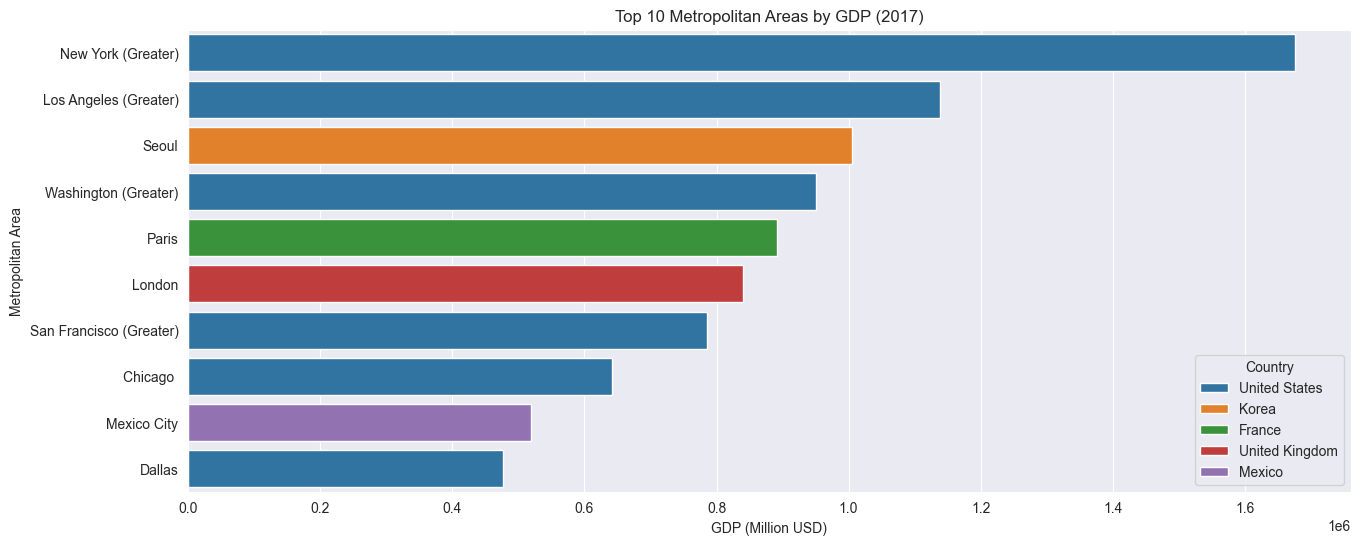

In [7]:
# copy data
df = gdp_metropol.copy()

# sort data by value
data_sorted = df.sort_values(by='Value 2017', ascending=False)
top10 = data_sorted.head(10)

# build the barplot of this data
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
sns.barplot(data=top10, x='Value 2017', y='Metropolitan areas', hue='Country', dodge=False)
plt.title('Top 10 Metropolitan Areas by GDP (2017)')
plt.xlabel('GDP (Million USD)')
plt.ylabel('Metropolitan Area')
plt.show()


## Global Economic Champions: Top 10 Metropolitan GDP Leaders

**Absolute Economic Dominance**: The top 10 metropolitan areas by GDP represent the pinnacle of global urban economic concentration, with individual metro areas generating economic output comparable to entire nations. These rankings reveal the extraordinary concentration of economic activity in specific urban centers, highlighting the role of mega-cities as primary drivers of both national and global economic growth.

**Geographic & Economic Patterns**: The composition of top metropolitan areas reflects broader patterns of economic development, technological innovation, and historical advantages in global trade and finance. Understanding which metros dominate absolute GDP rankings provides insight into global economic power distribution and identifies the urban centers that disproportionately influence global economic trends, policy decisions, and market dynamics.

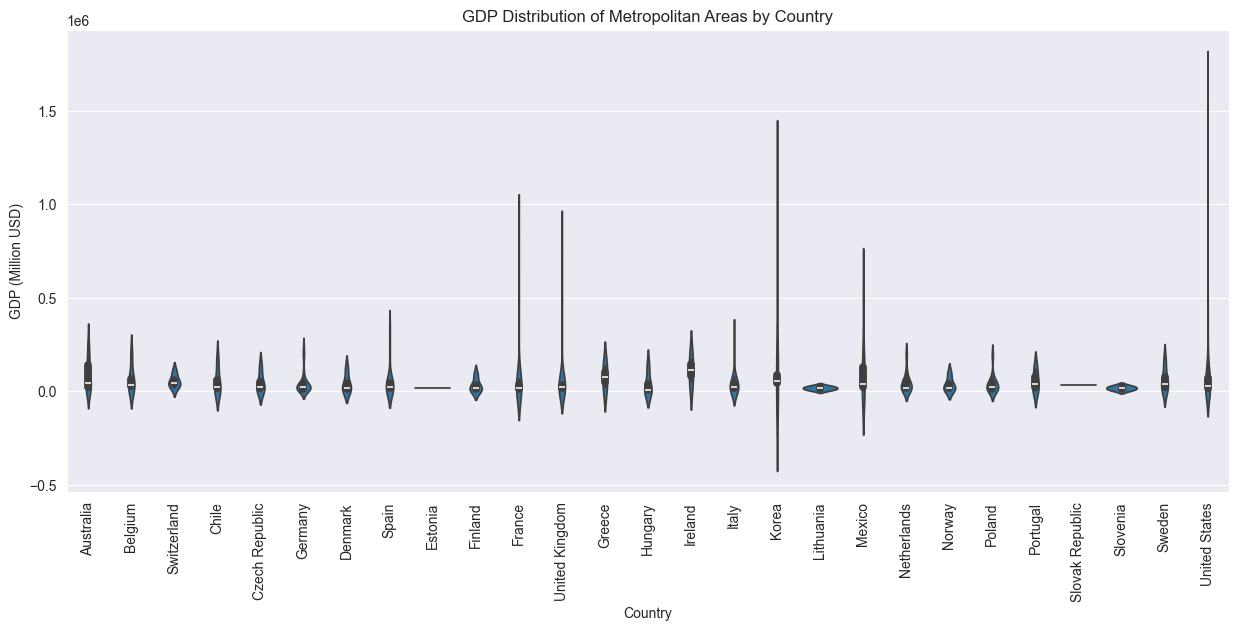

In [8]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=gdp_metropol, x='Country', y='Value 2017')
plt.xticks(rotation=90)
plt.title('GDP Distribution of Metropolitan Areas by Country')
plt.ylabel('GDP (Million USD)')
plt.show()


## Metropolitan Economic Distribution: Understanding Country-Level Urban GDP Patterns

**Distribution Shape Analysis**: The violin plot visualization reveals the distribution characteristics of metropolitan GDP within each country, showing not just central tendencies but also the spread, skewness, and presence of outliers in urban economic performance. This analysis uncovers different national patterns of urban economic concentration—some countries exhibit relatively uniform metropolitan GDP levels, while others show extreme concentration in one or few dominant urban centers.

**National Urban Economic Strategies**: The distribution patterns reflect different approaches to urban development and economic policy. Countries with wide distributions typically have one mega-city that dominates national economic activity, while countries with narrow distributions demonstrate more balanced urban development. Understanding these patterns provides insight into national economic vulnerabilities, regional development policies, and the sustainability of urban economic growth models across different national contexts.

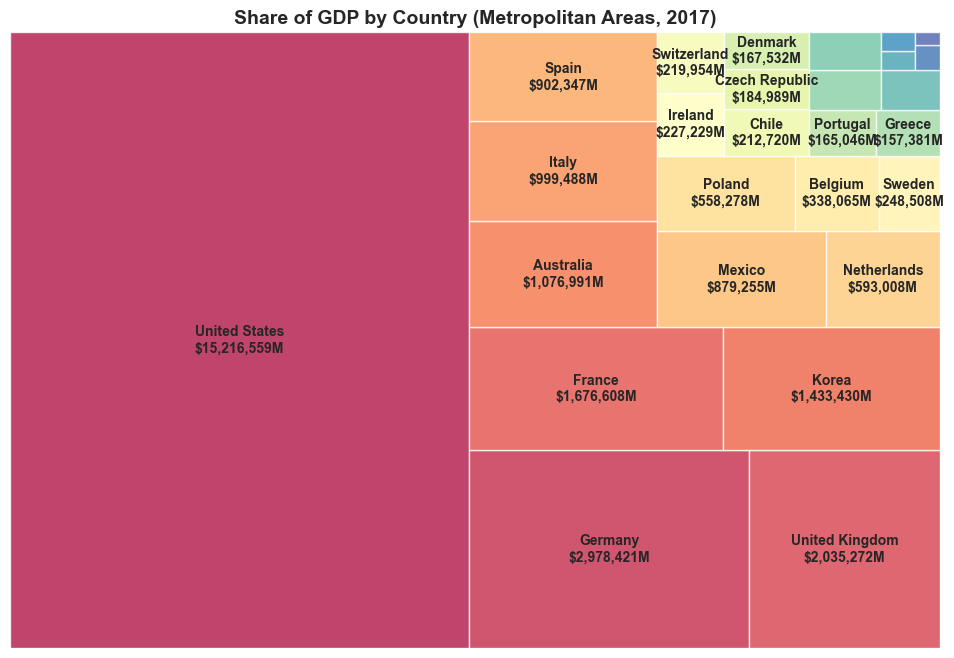

In [14]:
# import treemap module
import squarify

# Group by country
country_gdp = (gdp_metropol.groupby('Country', as_index=False)['Value 2017'].sum().sort_values('Value 2017', ascending=False))
plt.figure(figsize=(12,8))
colors = sns.color_palette("Spectral", len(country_gdp))
labels = [
    f"{c}\n${v:,.0f}M" if i < 20 else ""
    for i, (c, v) in enumerate(zip(country_gdp['Country'], country_gdp['Value 2017']))
]

squarify.plot(
    sizes=country_gdp['Value 2017'],
    label=labels,
    color=sns.color_palette("Spectral", len(country_gdp)),
    alpha=0.8,
    text_kwargs={'fontsize': 10, 'weight': 'bold'}
)

plt.title("Share of GDP by Country (Metropolitan Areas, 2017)", fontsize=14, weight='bold')
plt.axis('off')
plt.show()



## Proportional Economic Power: Country Share of Global Metropolitan GDP

**Visual Proportionality Analysis**: The treemap visualization provides an intuitive understanding of each country's relative contribution to global metropolitan economic output, where area size directly corresponds to economic significance. This approach reveals the dramatic differences in scale between economic powers and smaller nations, making visible the concentration of global urban economic activity in a relatively small number of countries.

**Global Economic Hierarchy**: The proportional representation highlights the multi-tiered nature of global economic power, distinguishing between economic superpowers, major economies, emerging markets, and smaller economies. This visualization enables quick identification of which countries drive global metropolitan economic growth and reveals the potential impact of economic developments in different nations on global urban economic stability and growth trends.

In [17]:
gdp_metropol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 1 to 443
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             443 non-null    object
 1   Metropolitan areas  443 non-null    object
 2   Value 2017          443 non-null    object
dtypes: object(3)
memory usage: 10.5+ KB


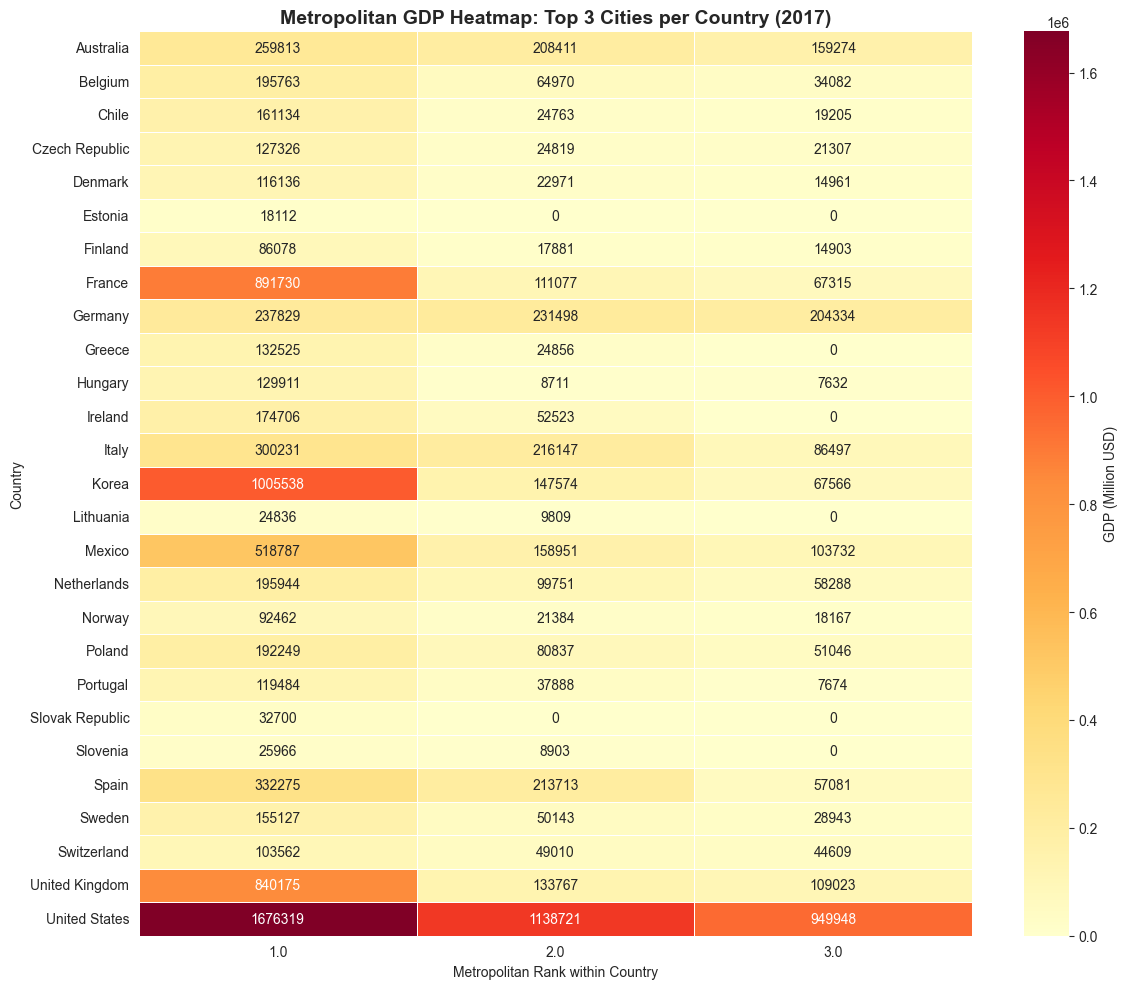

Top 10 Countries by Total Metropolitan GDP:
                Metro_Count  Total_GDP   Avg_GDP
Country                                         
United States           166   15216559   91666.0
Germany                  68    2978421   43800.0
United Kingdom           40    2035272   50882.0
France                   30    1676608   55887.0
Korea                     8    1433430  179179.0
Australia                12    1076991   89749.0
Italy                    19     999488   52605.0
Spain                    16     902347   56397.0
Mexico                    7     879255  125608.0
Netherlands              13     593008   45616.0


In [19]:
# Create a heatmap showing GDP distribution across countries and metro rankings
# Convert GDP values to numeric and sort by GDP
gdp_metropol['Value 2017'] = pd.to_numeric(gdp_metropol['Value 2017'], errors='coerce')

# Create ranking within each country
gdp_metropol['Country_Rank'] = gdp_metropol.groupby('Country')['Value 2017'].rank(ascending=False, method='dense')

# Filter to show only top 3 metros per country for clarity
top_metros = gdp_metropol[gdp_metropol['Country_Rank'] <= 3].copy()

# Create pivot table for heatmap
heatmap_data = top_metros.pivot_table(
    index='Country', 
    columns='Country_Rank', 
    values='Value 2017', 
    fill_value=0
)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.0f', 
            cmap='YlOrRd', 
            cbar_kws={'label': 'GDP (Million USD)'},
            linewidths=0.5)

plt.title('Metropolitan GDP Heatmap: Top 3 Cities per Country (2017)', fontsize=14, weight='bold')
plt.xlabel('Metropolitan Rank within Country')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Show country summary statistics
country_summary = gdp_metropol.groupby('Country')['Value 2017'].agg(['count', 'sum', 'mean']).round(0)
country_summary.columns = ['Metro_Count', 'Total_GDP', 'Avg_GDP']
country_summary = country_summary.sort_values('Total_GDP', ascending=False)

print("Top 10 Countries by Total Metropolitan GDP:")
print(country_summary.head(10))

## Internal Metropolitan Hierarchies: Country-Level Urban Economic Rankings & Strategic Insights

**Within-Country Economic Structure**: The heatmap analysis reveals the internal metropolitan economic hierarchies within each country, showing how economic power is distributed among a nation's top urban centers. This granular view exposes whether countries rely on single dominant metropolitan areas or maintain more balanced urban economic networks, providing critical insight into economic resilience, regional development success, and potential vulnerabilities to metropolitan-specific economic shocks.

**Strategic Economic Intelligence**: Understanding internal metropolitan hierarchies enables sophisticated analysis of national economic strategies, investment priorities, and policy effectiveness. Countries with balanced metropolitan development demonstrate diversified economic risk profiles and potentially more sustainable growth models, while those with extreme concentration in single metros may offer concentrated opportunities but also systemic risks. This analysis provides essential intelligence for international economic partnerships, investment allocation decisions, and understanding the geographic distribution of economic opportunity and risk in the global economy.